# U1B model: neutrino masses

The idea is to check the neutrino mases to one loop.
Leshouches dictionary, SPHENO_4.0.3, micromegas_5.0.4

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time
import sys

%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
import pyslha
import pyU1B_LesHouches_generator

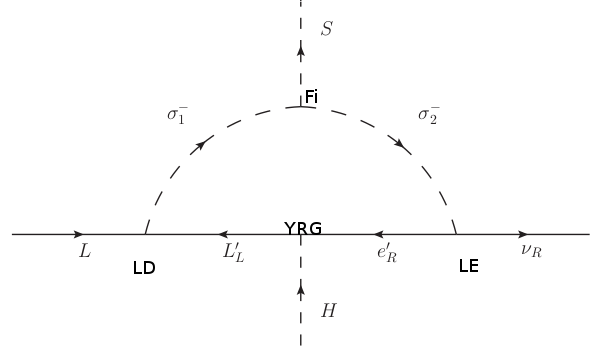

In [3]:
from IPython.display import Image
Image("zee-couplings.png")

run diccionary

In [23]:
# Tiempo inicial
t1=time.time() 

x=[]

Num = 5

for i in range (0,Num):
    
    xdict = pyU1B_LesHouches_generator.buildSLHAinFile()

    L2 = -7.23E-2
    YA1 = 0.6
    YC1 = 1.0 #control the Fvv mass
    vx = np.random.uniform(1500,3000)
    YRG = 5.1E-1
    
    Fi11 = 0.112
    Fi12 = 0.1
    Fi21 = 0.2
    Fi22 = 0.3
    
    LD11 = 1.1E-1
    LD12 = 1.2E-1
    LD13 = 1.2E-2
    LD21 = 1.1E-2
    LD22 = 1.3E-2
    LD23 = 1.21E-2
    
    LE11 = 1.11E-1
    LE12 = 1.12E-1
    LE21 = 1.13E-1
    LE22 = 1.14E-2
    
    #Modify one parameter
    xdict.blocks['MINPAR'].entries[2]='%.6E    # Lambda2INPUT'%L2
    xdict.blocks['MINPAR'].entries[7]='%.6E    # YA1INPUT'%YA1
    xdict.blocks['MINPAR'].entries[11]='%.6E    # YC1INPUT'%YC1
    xdict.blocks['MINPAR'].entries[13]='%.6E    # YRGINPUT'%YRG
    xdict.blocks['MINPAR'].entries[15]='%.6E    # vXInput'%vx
    
    xdict.blocks['FIIN'].entries[1,1]='%.6E    # Fi(1,1)'%Fi11
    xdict.blocks['FIIN'].entries[1,2]='%.6E    # Fi(1,2)'%Fi12
    xdict.blocks['FIIN'].entries[2,1]='%.6E    # Fi(2,1)'%Fi21
    xdict.blocks['FIIN'].entries[2,2]='%.6E    # Fi(2,2)'%Fi22
    
    xdict.blocks['LDIN'].entries[1,1]='%.6E    # LD(1,1)'%LD11
    xdict.blocks['LDIN'].entries[1,2]='%.6E    # LD(1,2)'%LD12
    xdict.blocks['LDIN'].entries[1,3]='%.6E    # LD(1,3)'%LD13
    xdict.blocks['LDIN'].entries[2,1]='%.6E    # LD(2,1)'%LD21
    xdict.blocks['LDIN'].entries[2,2]='%.6E    # LD(2,2)'%LD22
    xdict.blocks['LDIN'].entries[2,3]='%.6E    # LD(2,3)'%LD23
    
    xdict.blocks['LEIN'].entries[1,1]='%.6E    # LE(1,1)'%LE11
    xdict.blocks['LEIN'].entries[1,2]='%.6E    # LE(1,2)'%LE12
    xdict.blocks['LEIN'].entries[2,1]='%.6E    # LE(2,1)'%LE21
    xdict.blocks['LEIN'].entries[2,2]='%.6E    # LE(2,2)'%LE22
                
    pyslha.writeSLHAFile('LesHouches.in.U1B_low',xdict) 

    #run SPheno
    spheno = subprocess.getoutput('~/Work/SPheno-4.0.3/bin/SPhenoU1B LesHouches.in.U1B_low')    
    so = subprocess.getoutput('cat SPheno.spc.U1B')
    
    #capturo algo de spheno
    MZp = eval(so.split('# VWm')[1].split()[1])
    mnu1 = np.abs(eval(so.split('# Fe_3')[1].split()[1]))
    mnu2 = np.abs(eval(so.split('# Fe_3')[1].split()[5]))
    mnu3 = np.abs(eval(so.split('# Fe_3')[1].split()[13]))
    
    ZP22 = eval(so.split('# ZP(2,1)')[1].split()[2])
    ZP23 = eval(so.split('# ZP(2,1)')[1].split()[7])
    ZP24 = eval(so.split('# ZP(2,1)')[1].split()[12])
    ZP25 = eval(so.split('# ZP(2,1)')[1].split()[17])

    ZP32 = eval(so.split('# ZP(2,1)')[1].split()[27])
    ZP33 = eval(so.split('# ZP(2,1)')[1].split()[32])
    ZP34 = eval(so.split('# ZP(2,1)')[1].split()[37])
    ZP35 = eval(so.split('# ZP(2,1)')[1].split()[42])

    ZP42 = eval(so.split('# ZP(2,1)')[1].split()[52])
    ZP43 = eval(so.split('# ZP(2,1)')[1].split()[57])
    ZP44 = eval(so.split('# ZP(2,1)')[1].split()[62])
    ZP45 = eval(so.split('# ZP(2,1)')[1].split()[67])

    ZP52 = eval(so.split('# ZP(2,1)')[1].split()[77])
    ZP53 = eval(so.split('# ZP(2,1)')[1].split()[82])
    ZP54 = eval(so.split('# ZP(2,1)')[1].split()[87])
    ZP55 = eval(so.split('# ZP(2,1)')[1].split()[92])
    
    mH2=eval(so.split('Block MASS')[1].split()[17])
    mH3=eval(so.split('Block MASS')[1].split()[21])
    mH4=eval(so.split('Block MASS')[1].split()[25])
    mH5=eval(so.split('Block MASS')[1].split()[29])
    meD1=eval(so.split('# Fvv')[1].split()[1])
    meD2=eval(so.split('# Fvv')[1].split()[5])
    
    VL11=eval(so.split('Block UELDMIX')[1].split()[6])
    VL12=eval(so.split('Block UELDMIX')[1].split()[11])
    VL21=eval(so.split('Block UELDMIX')[1].split()[16])
    VL22=eval(so.split('Block UELDMIX')[1].split()[21])

    UL11=eval(so.split('Block UERDMIX')[1].split()[6])
    UL12=eval(so.split('Block UERDMIX')[1].split()[11])
    UL21=eval(so.split('Block UERDMIX')[1].split()[16])
    UL22=eval(so.split('Block UERDMIX')[1].split()[21])
     
    x.append([L2,YA1,YC1,vx,YRG,Fi11,Fi12,Fi21,Fi22,LD11,LD12,LD13,LD21,LD22,LD23,LE11,LE12,LE21,LE22,MZp,\
              mnu1,mnu2,mnu3,ZP22,ZP23,ZP24,ZP25,ZP32,ZP33,ZP34,ZP35,ZP42,ZP43,ZP44,ZP45,ZP52,ZP53,ZP54,ZP55,\
             mH2,mH3,mH4,mH5,meD1,meD2,VL11,VL12,VL21,VL22,UL11,UL12,UL21,UL22])

x=np.asarray(x)
xd=pd.DataFrame(x,columns=['L2','YA1','YC1','vx','YRG','Fi11','Fi12','Fi21','Fi22','LD11','LD12','LD13',\
                           'LD21','LD22','LD23','LE11','LE12','LE21','LE22','MZp','mnu1','mnu2','mnu3',\
                           'ZP22','ZP23','ZP24','ZP25','ZP32','ZP33','ZP34','ZP35','ZP42','ZP43','ZP44',\
                           'ZP45','ZP52','ZP53','ZP54','ZP55','mH2','mH3','mH4','mH5','meD1','meD2',\
                           'VL11','VL12','VL21','VL22','UL11','UL12','UL21','UL22'])  

t2=time.time() 
print ("The program spent", t2-t1, "s running",Num,"times")   

The program spent 6.471287488937378 s running 5 times


In [24]:
xd

,L2,YA1,YC1,vx,YRG,Fi11,Fi12,Fi21,Fi22,LD11,...,meD1,meD2,VL11,VL12,VL21,VL22,UL11,UL12,UL21,UL22
0,-0.0723,0.6,1.0,2426.142022,0.51,0.112,0.1,0.2,0.3,0.11,...,342.524326,1717.93057,-0.011950,0.999929,0.999929,0.011950,0.998552,-0.053787,0.053787,0.998552
1,-0.0723,0.6,1.0,1502.657445,0.51,0.112,0.1,0.2,0.3,0.11,...,211.568068,1066.39116,-0.019203,0.999816,0.999816,0.019203,0.996241,-0.086621,0.086621,0.996241
2,-0.0723,0.6,1.0,1840.484819,0.51,0.112,0.1,0.2,0.3,0.11,...,259.515272,1304.56683,-0.015718,0.999876,0.999876,0.015718,0.997489,-0.070819,0.070819,0.997489
3,-0.0723,0.6,1.0,2391.003445,0.51,0.112,0.1,0.2,0.3,0.11,...,337.546375,1693.11860,-0.012125,0.999926,0.999926,0.012125,0.998510,-0.054574,0.054574,0.998510
4,-0.0723,0.6,1.0,2276.655575,0.51,0.112,0.1,0.2,0.3,0.11,...,321.345645,1612.38459,-0.012730,0.999919,0.999919,0.012730,0.998357,-0.057306,0.057306,0.998357


Neutrino funtions

In [25]:
#Loop factor
def LF(me,mH,Vl1,Ul1):
    
    mk = 1./(16.*np.pi**2)*Vl1*Ul1*me*(me**2*np.log(me**2)-mH**2*np.log(mH**2))/(me**2-mH**2)
    
    return mk   

In [26]:
#sum over L
def SUML(me1,me2,mHj,V11,V21,U11,U21):
    
    kk = LF(me1,mHj,V11,U11) + LF(me2,mHj,V21,U21)
    
    return kk

In [27]:
SUML(2,3,4,1,0.5,1,0.2)

0.047640438298904977

In [28]:
#Lambda j term
def Lj(Zja,Zjb,me1,me2,mHj,V11,V21,U11,U21):
    
    kj = Zja*Zjb*SUML(me1,me2,mHj,V11,V21,U11,U21)
    
    return kj

In [29]:
Lj(0.2,0.3,100,200,300,0.2,0.3,1,1)

0.36362510170408341

In [30]:
#sum over j={2,5} and depend from a and b
def Lab(Z2a,Z3a,Z4a,Z5a,Z2b,Z3b,Z4b,Z5b,me1,me2,mH2,mH3,mH4,mH5,V11,V21,U11,U21):
    
    sj = Lj(Z2a,Z2b,me1,me2,mH2,V11,V21,U11,U21)+Lj(Z3a,Z3b,me1,me2,mH3,V11,V21,U11,U21)+\
         Lj(Z4a,Z4b,me1,me2,mH4,V11,V21,U11,U21)+Lj(Z5a,Z5b,me1,me2,mH5,V11,V21,U11,U21)
    
    return sj

In [31]:
Lab(0.1,1,0.3,.8,.5,.6,.8,.2,100,200,300,400,500,600,.2,.5,.6,.3)

3.4980371542795701

Neutrino $M_{ij}^{\nu}$ matrix:

\begin{equation}
M_{ik}^{\nu} = (h_d)^{\alpha i} \Lambda^{\alpha\beta} (h_e)^{\beta k}
\end{equation}

In [32]:
def Mab(Z22,Z23,Z24,Z25,Z32,Z33,Z34,Z35,Z42,Z43,Z44,Z45,Z52,Z53,Z54,Z55,\
         me1,me2,mH2,mH3,mH4,mH5,V11,V21,U11,U21,hd11,hd12,hd13,hd21,hd22,hd23,he11,he12,he13,he21,he22,he23):

    #Matrix elements LAMBDAab
    L11 = Lab(Z22,Z32,Z42,Z52,Z24,Z34,Z44,Z54,me1,me2,mH2,mH3,mH4,mH5,V11,V21,U11,U21)
    L12 = Lab(Z22,Z32,Z42,Z52,Z25,Z35,Z45,Z55,me1,me2,mH2,mH3,mH4,mH5,V11,V21,U11,U21)
    L21 = Lab(Z23,Z33,Z43,Z53,Z24,Z34,Z44,Z54,me1,me2,mH2,mH3,mH4,mH5,V11,V21,U11,U21)
    L22 = Lab(Z23,Z33,Z43,Z53,Z25,Z35,Z45,Z55,me1,me2,mH2,mH3,mH4,mH5,V11,V21,U11,U21)
    
    M11 = hd11*(L11*he11+L12*he21) + hd21*(L21*he11+L22*he21)
    M12 = hd11*(L11*he12+L12*he22) + hd21*(L21*he12+L22*he22)
    M13 = hd11*(L11*he13+L12*he23) + hd21*(L21*he13+L22*he23)
    M21 = hd12*(L11*he11+L12*he21) + hd22*(L21*he11+L22*he21)
    M22 = hd12*(L11*he12+L12*he22) + hd22*(L21*he12+L22*he22)
    M23 = hd12*(L11*he13+L12*he23) + hd22*(L21*he13+L22*he23)
    M31 = hd13*(L11*he11+L12*he21) + hd23*(L21*he11+L22*he21)
    M32 = hd13*(L11*he12+L12*he22) + hd23*(L21*he12+L22*he22)
    M33 = hd13*(L11*he13+L12*he23) + hd23*(L21*he13+L22*he23)
    
    Mvik = np.matrix( [[M11, M12, M13],
                   [M21, M22, M23],
                   [M31, M32, M33]] )
    
    #eigenvalues e eigenvectors
    (Mdiag2,V)=np.linalg.eig(Mvik*np.transpose(Mvik))
    
    #took eigenvalues
    MX1 = np.sqrt(np.abs(Mdiag2[0]))
    MX2 = np.sqrt(np.abs(Mdiag2[1]))
    MX3 = np.sqrt(np.abs(Mdiag2[2]))
    
    ## reorganize the eigenvalues (neutrino masses)
    mn1 = 0.0
    mn2 = 0.0
    mn3 = 0.0

    if MX1 < MX2 and MX1 < MX3:
        mn1 = MX1
        #print "Hola1"

        if MX2 < MX3:
            mn2 = MX2
            mn3 = MX3
        else:
            mn2 = MX3
            mn3 = MX2  

    if MX2 < MX1 and MX2 < MX3:
        mn1 = MX2
        #print "Hola2" 

        if MX1 < MX3:
            mn2 = MX1
            mn3 = MX3
        else:
            mn2 = MX3
            mn3 = MX1   

    if MX3 < MX1 and MX3 < MX2:
        mn1 = MX3
        #print "Hola3"  

        if MX1 < MX2:
            mn2 = MX1
            mn3 = MX2
        else:
            mn2 = MX2
            mn3 = MX1
    
    return mn1,mn2,mn3

In [33]:
#run all dataframe
MatrixDiag_new=np.vectorize(Mab,doc='Input for pyfunc below:\
Z22,Z23,Z24,Z25,Z32,Z33,Z34,Z35,Z42,Z43,Z44,Z45,Z52,Z53,Z54,Z55,\
         me1,me2,mH2,mH3,mH4,mH5,V11,V21,U11,U21,hd11,hd12,hd13,hd21,hd22,hd23,he11,he12,he13,he21,he22,he23')

In [34]:
#Add to the DataFrame  not working
MatrixDiag_new(xd.ZP22,xd.ZP23,xd.ZP24,xd.ZP25,xd.ZP32,xd.ZP33,xd.ZP34,xd.ZP35,xd.ZP42,xd.ZP43,xd.ZP44,xd.ZP45,\
               xd.ZP52,xd.ZP53,xd.ZP54,xd.ZP55,xd.meD1,xd.meD2,xd.mH2,xd.mH3,xd.mH4,xd.mH5,xd.VL11,xd.VL21,\
               xd.UL11,xd.UL21,xd.LD11,xd.LD12,xd.LD13,xd.LD21,xd.LD22,xd.LD23,xd.LE11,xd.LE12,0.,xd.LE21,xd.LE22,0.)


ValueError: Cannot construct a ufunc with more than 32 operands (requested number were: inputs = 38 and outputs = 3)

In [35]:
Mab(ZP22,ZP23,ZP24,ZP25,ZP32,ZP33,ZP34,ZP35,ZP42,ZP43,ZP44,ZP45,ZP52,ZP53,ZP54,ZP55,meD1,meD2,mH2,mH3,mH4,mH5,\
    VL11,VL21,UL11,UL21,LD11,LD12,LD13,LD21,LD22,LD23,LE11,LE12,0.,LE21,LE22,0.)

(4.9458788608444886e-16, 1.8286747399930898e-10, 5.629896435537061e-08)

In [36]:
Mab(xd.ZP22[0],xd.ZP23[0],xd.ZP24[0],xd.ZP25[0],xd.ZP32[0],xd.ZP33[0],xd.ZP34[0],xd.ZP35[0],xd.ZP42[0],xd.ZP43[0],\
                           xd.ZP44[0],xd.ZP45[0],xd.ZP52[0],xd.ZP53[0],xd.ZP54[0],xd.ZP55[0],xd.meD1[0],xd.meD2[0],\
    xd.mH2[0],xd.mH3[0],xd.mH4[0],xd.mH5[0],xd.VL11[0],xd.VL21[0],xd.UL11[0],xd.UL21[0],xd.LD11[0],xd.LD12[0],\
    xd.LD13[0],xd.LD21[0],xd.LD22[0],xd.LD23[0],xd.LE11[0],xd.LE12[0],0.,xd.LE21[0],xd.LE22[0],0.)

(8.7671009188426545e-16, 1.9286950284746203e-10, 5.8944628881312533e-08)

In [37]:
y=[]

for i in range(0,xd.shape[0]):
    
    a = Mab(xd.ZP22[i],xd.ZP23[i],xd.ZP24[i],xd.ZP25[i],xd.ZP32[i],xd.ZP33[i],xd.ZP34[i],xd.ZP35[i],xd.ZP42[i],xd.ZP43[i],\
                           xd.ZP44[i],xd.ZP45[i],xd.ZP52[i],xd.ZP53[i],xd.ZP54[i],xd.ZP55[i],xd.meD1[i],xd.meD2[i],\
    xd.mH2[i],xd.mH3[i],xd.mH4[i],xd.mH5[i],xd.VL11[i],xd.VL21[i],xd.UL11[i],xd.UL21[i],xd.LD11[i],xd.LD12[i],\
    xd.LD13[i],xd.LD21[i],xd.LD22[i],xd.LD23[i],xd.LE11[i],xd.LE12[i],0.,xd.LE21[i],xd.LE22[i],0.)
    
    mn1 = a[0]
    mn2 = a[1]
    mn3 = a[2]
    
    #print(mnu1,mnu2,mnu3)
    
    y.append([mn1,mn2,mn3])

y=np.asarray(y)
yd=pd.DataFrame(y,columns=['mn1','mn2','mn3'])

In [38]:
yd

,mn1,mn2,mn3
0,8.767101e-16,1.928695e-10,5.894463e-08
1,5.899399e-16,1.273649e-10,4.083155e-08
2,3.649130e-16,1.523839e-10,4.797197e-08
3,4.431837e-16,1.905381e-10,5.833170e-08
4,4.945879e-16,1.828675e-10,5.629896e-08


In [39]:
xd[['mnu1','mnu2','mnu3']]

,mnu1,mnu2,mnu3
0,4.389999e-28,1.928695e-10,5.894463e-08
1,1.576841e-27,1.273649e-10,4.083155e-08
2,1.275438e-27,1.523839e-10,4.797197e-08
3,2.573202e-27,1.905381e-10,5.833170e-08
4,1.568334e-27,1.828675e-10,5.629896e-08


In [40]:
#good plots
plt.rcParams.update({'font.size': 20}) 
#plt.rc('font',size='18')

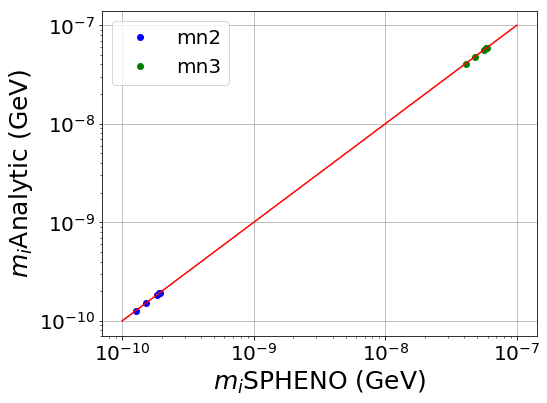

In [41]:
plt.figure(figsize=(8,6))

#plt.loglog(xd.mv1,xd.mn1,'bo')
plt.loglog(xd.mnu2,yd.mn2,'bo')
plt.loglog(xd.mnu3,yd.mn3,'go')

a = np.linspace(1e-10,1e-07,20)
plt.plot(a,a,'r-')

plt.xlabel(r'$m_i$SPHENO (GeV)',size=25)
plt.ylabel(r'$m_i$Analytic (GeV)',size=25)
plt.legend()

plt.grid()

plt.tight_layout()
plt.savefig('plots/neutrino_masses.pdf')